# Penulis
#### Kelompok: LoremIpsum(K-3), anggota:
- Ferdian Ifkarsyah(13517024)
- Hendry Prasetya(13517105)

# SOAL 2: Crime

## A. Memilah Kolom yang Penting

In [1]:
import pandas as pd
import matplotlib as plt
from scipy.stats import binom
from numpy import arange

In [2]:
df = pd.read_csv('../dataset/crime.csv', encoding = 'ISO-8859-1', low_memory=False)
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495      NaN   
1                 PROPERTY - LOST      D14            795      NaN   
2       THREATS TO DO BODILY HARM       B2            329      NaN   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92      NaN   
4              AIRCRAFT INCIDENTS       A7             36      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

In [3]:
df = df.drop(['Lat', 'Long', 'Location', 'UCR_PART', 'OFFENSE_DESCRIPTION', 'OCCURRED_ON_DATE'], axis=1)
df['SHOOTING'] = df['SHOOTING'].fillna('N')
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP DISTRICT REPORTING_AREA  \
0      I182080058          2403  Disorderly Conduct      E18            495   
1      I182080053          3201       Property Lost      D14            795   
2      I182080052          2647               Other       B2            329   
3      I182080051           413  Aggravated Assault       A1             92   
4      I182080050          3122            Aircraft       A7             36   

  SHOOTING  YEAR  MONTH DAY_OF_WEEK  HOUR        STREET  
0        N  2018     10   Wednesday    20  ARLINGTON ST  
1        N  2018      8    Thursday    20    ALLSTON ST  
2        N  2018     10   Wednesday    19      DEVON ST  
3        N  2018     10   Wednesday    20  CAMBRIDGE ST  
4        N  2018     10   Wednesday    20   PRESCOTT ST

In [4]:
df.dtypes

INCIDENT_NUMBER       object
OFFENSE_CODE           int64
OFFENSE_CODE_GROUP    object
DISTRICT              object
REPORTING_AREA        object
SHOOTING              object
YEAR                   int64
MONTH                  int64
DAY_OF_WEEK           object
HOUR                   int64
STREET                object
dtype: object

### Deskripsi Beberapa Kolom
#### Tipe Kejahatan
- INCIDENT_NUMBER: ID spesifik tiap insiden
- OFFENSE_CODE_GROUP: jenis grup kejahatan
- OFFENSE_CODE: kode spesifik tiap jenis kejahatan
- SHOOTING: Apakah terjadi penembakan?

#### Lokasi
- DISTRICT: distrik tempat terjadinya insiden
- STREET: jalan tempat terjadinya insiden
- REPORTING_AREA: nomor kantor polisi tempat pelaporan

## B. Statistical Description

In [5]:
df.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR
count  327820.000000  327820.000000  327820.000000  327820.000000
mean     2317.961171    2016.598676       6.672213      13.114840
std      1184.990073       1.009775       3.253984       6.292714
min       111.000000    2015.000000       1.000000       0.000000
25%      1001.000000    2016.000000       4.000000       9.000000
50%      2907.000000    2017.000000       7.000000      14.000000
75%      3201.000000    2017.000000       9.000000      18.000000
max      3831.000000    2018.000000      12.000000      23.000000

In [6]:
df.var()

OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
dtype: float64

In [7]:
df.mode(dropna=False)

INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP DISTRICT  \
0      I162030584          3006  Motor Vehicle Accident Response       B2   

  REPORTING_AREA SHOOTING  YEAR  MONTH DAY_OF_WEEK  HOUR         STREET  
0                       N  2017      8      Friday    17  WASHINGTON ST

In [8]:
df.skew()

OFFENSE_CODE   -0.410645
YEAR           -0.083805
MONTH          -0.119591
HOUR           -0.482938
dtype: float64

Pengertian df.skew()
- Lebih banyak insiden yang terjadi pada tahun 2017 dan 2018 dibanding 2015 dan 2016
- Lebih banyak insiden yang terjadi antara bulan Juli sampai Desember dibanding bulan Januari sampai Juni
- Lebih banyak insiden yang terjadi antara pukul 14 sampai 23 dibanding dari pukul 0 sampai 13

In [9]:
df.kurtosis()

OFFENSE_CODE   -1.415226
YEAR           -1.090411
MONTH          -1.035742
HOUR           -0.600736
dtype: float64

Pengertian df.kurtosis(): data mempunyai lebih sedikit 'outlier' dibanding normal distribution

## C. Plotting Tabel

### Kejadian berdasarkan Waktu-Histogram

In [10]:
df[['HOUR']].plot(kind='HIST')

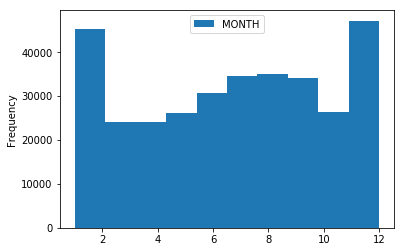

In [11]:
df[['MONTH']].plot(kind='HIST')

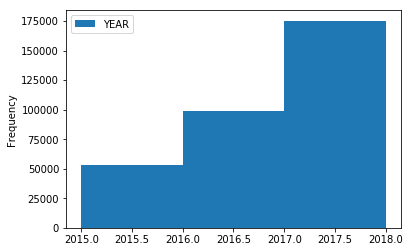

In [12]:
df[['YEAR']].plot(kind='HIST', bins=[2015,2016,2017,2018])

### Kejadian berdasarkan Waktu - BoxPlot

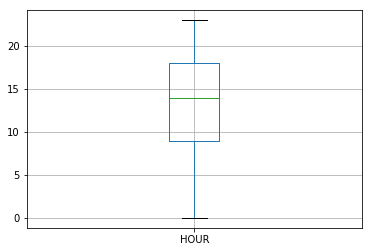

In [13]:
df[['HOUR']].boxplot()

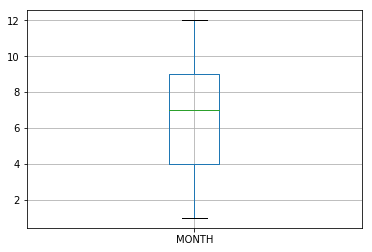

In [14]:
df[['MONTH']].boxplot()

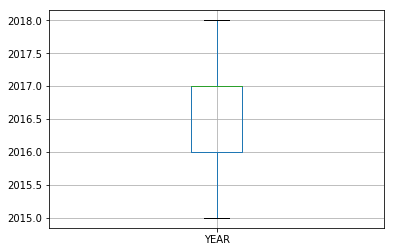

In [15]:
df[['YEAR']].boxplot()

### Kejadian berdasarkan OFFENSE_CODE_GROUP

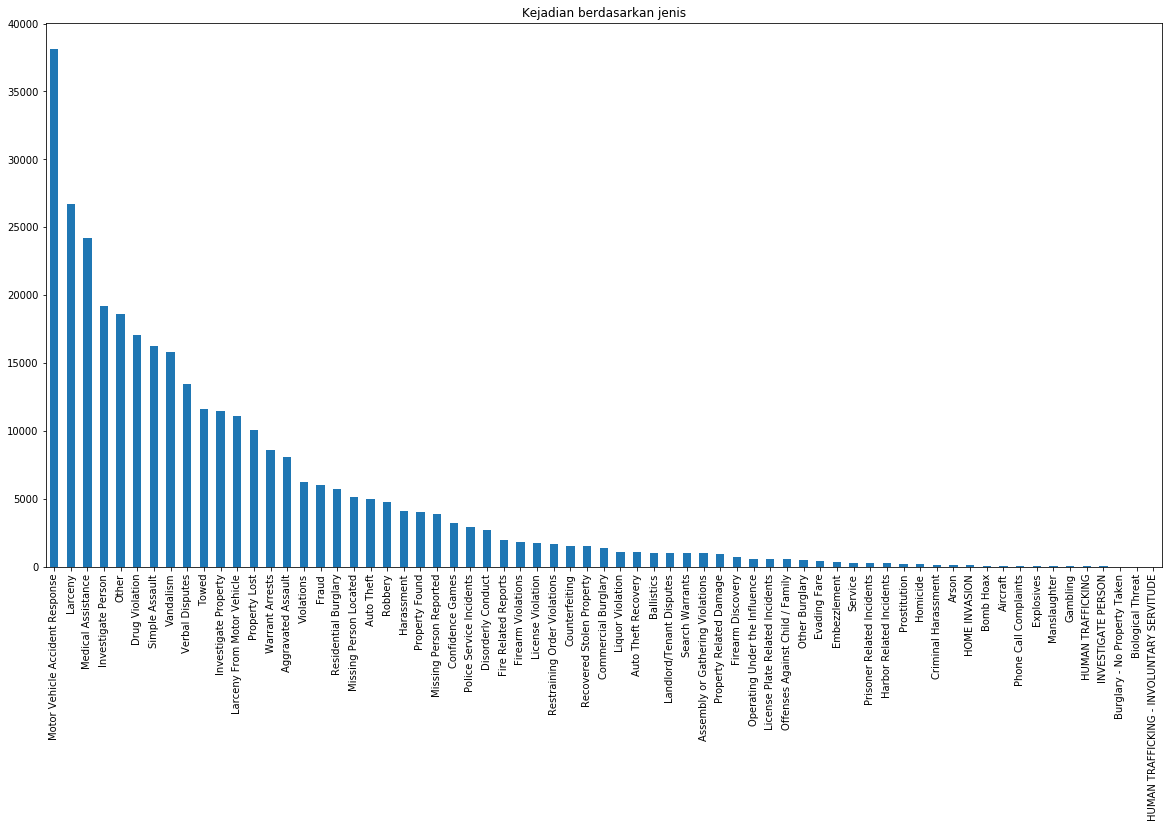

In [16]:
df['OFFENSE_CODE_GROUP'].value_counts().plot.bar(title='Kejadian berdasarkan jenis',figsize=(20,10));

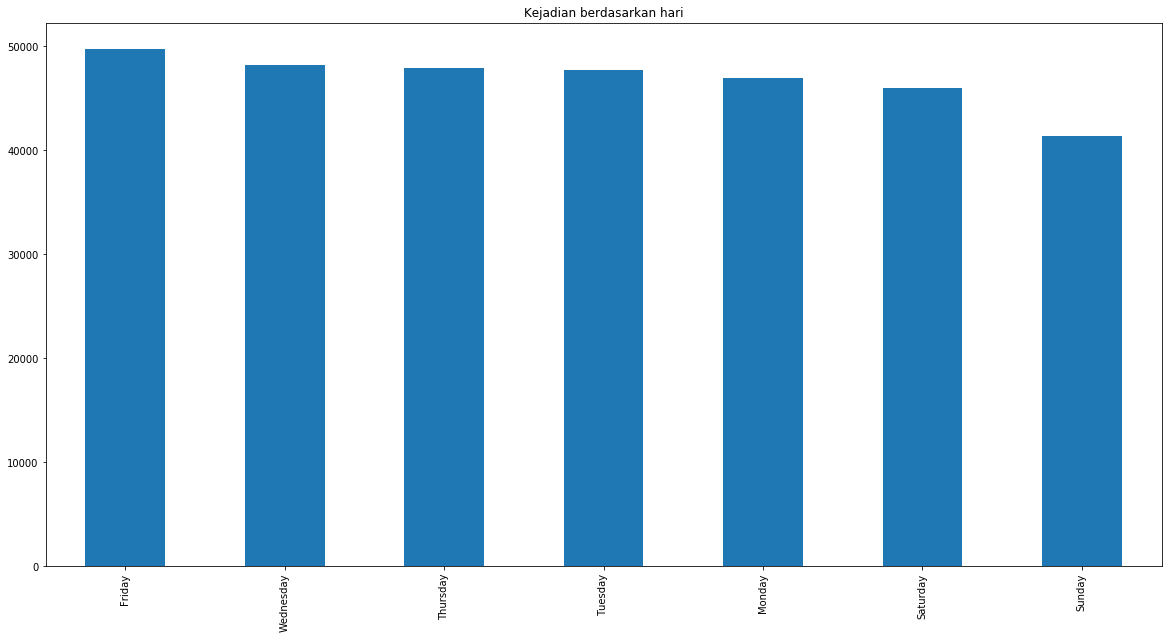

In [17]:
df['DAY_OF_WEEK'].value_counts().plot.bar(title='Kejadian berdasarkan hari',figsize=(20,10));

## D. Fungsi Distribusi

- Fungsi distribusi yang paling sesuai untuk variabel SHOOTING adalah Distribusi Binomial.
- Fungsi distribusi yang paling sesuai untuk variabel OFFENSE_CODE_GROUP adalah Distribusi Multinomial.
- Fungsi distribusi yang paling sesuai untuk variabel HOUR, MONTH, YEAR adalah Distribusi Poisson.

## E. Jawaban Pertanyaan

1. Jika terdapat 1000 kejahatan baru, tentukan ekspektasi kejahatan yang "homicide"?

In [18]:
count_homicide = len(df.loc[(df.OFFENSE_CODE_GROUP == 'Homicide')])
total_offense = len(df.OFFENSE_CODE_GROUP)
probability = count_homicide / total_offense
count_new = 1000

mlist = [x * binom.pmf(x, count_new, probability) for x in range(0, count_new)]
expectation = sum(mlist)
expectation

0.5033249954245659

Jika ada 1000 kejahatan baru, kita dapat berekpektasi bahwa 0.5033 nya adalah homicide

2. Jika terdapat 1000 kejahatan baru, tentukan ekspektasi kejahatan yang "homicide tanpa shooting"?

In [19]:
count_homicide = len(df.loc[(df.OFFENSE_CODE_GROUP == 'Homicide') & (df.SHOOTING != 'Y')])
total_offense = len(df.OFFENSE_CODE_GROUP)
probability = count_homicide / total_offense
count_new = 1000

mlist = [x * binom.pmf(x, count_new, probability) for x in range(0, count_new)]
expectation = sum(mlist)
expectation

0.12811908974447658

Jika ada 1000 kejahatan baru, kita dapat berekpektasi bahwa 0.1281 nya adalah homicide tanpa penembakan

3. Jika terdapat 1000 kejahatan baru, tentukan ekspektasi kejahatan yang terjadi jam 20.00 dan Hari Sabtu?

In [20]:
count_20_saturday = len(df.loc[(df.HOUR == 20) & (df.DAY_OF_WEEK == 'Saturday')])
total_offense = len(df.OFFENSE_CODE_GROUP)
probability = count_20_saturday / total_offense
count_new = 1000

mlist = [x * binom.pmf(x, count_new, probability) for x in range(0, count_new)]
expectation = sum(mlist)
expectation

6.683545848333584

Jika terdapat 1000 kejahatan baru, kita dapat berekspektasi 6.6835 nya terjadi pada hari Sabtu jam 20.00

4. Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang terletak di Geneva Ave atau Prescott Street?

In [21]:
count_street = len(df.loc[(df.STREET == 'GENEVA AVE') | (df.STREET == 'PRESCOTT ST')])
total_offense = len(df.OFFENSE_CODE_GROUP)
probability = count_street / total_offense
count_new = 1000

mlist = [x * binom.pmf(x, count_new, probability) for x in range(0, count_new)]
expectation = sum(mlist)
expectation

5.6097858580950914

Jika ada 2000 kejahatan baru, kita dapat berekpektasi bahwa 5.6097 nya terjadi di Geneva Ave atau Prescott Street

5. Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang dilaporkan di Kantor Polisi Nomor 495 dan District E18?

In [22]:
count_office495_e18 = len(df.loc[(df.REPORTING_AREA == '495') & (df.DISTRICT == 'E18')])
total_offense = len(df.OFFENSE_CODE_GROUP)
probability = count_office495_e18 / total_offense
count_new = 1000

mlist = [x * binom.pmf(x, count_new, probability) for x in range(0, count_new)]
expectation = sum(mlist)
expectation

1.5099749862734273

Jika ada 2000 kejahatan baru, kita dapat berekpektasi bahwa 1.5099 nya terjadi di District E18 dan dilaporkan di Kantor Polisi Nomor 495.

6. Jika terdapat 2000 kejahatan baru tentukan ekspektasi kejahatan yang tidak terjadi pada saat hari libur?

In [23]:
count_weekdays = len(df.loc[(df.DAY_OF_WEEK != 'Saturday') & (df.DAY_OF_WEEK != 'Sunday')])
total_offense = len(df.OFFENSE_CODE_GROUP)
probability = count_weekdays / total_offense
count_new = 1000

mlist = [x * binom.pmf(x, count_new, probability) for x in range(0, count_new)]
expectation = sum(mlist)
expectation

733.5641510589146

Jika ada 2000 kejahatan baru, kita dapat berekpektasi bahwa 733.5641 nya terjadi pada hari kerja